<a href="https://colab.research.google.com/github/ab3131/NBAInjuryPredictor/blob/main/NBAInjuryPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Statements

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Data Cleaning

In [163]:
player_stats = pd.read_csv('player_stats.csv')
injuries_original = pd.read_csv('NBA Player Injury Stats(1951 - 2023).csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [164]:
player_stats.columns[0]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Unnamed: 0'

In [165]:
injuries_original.columns[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Unnamed: 0'

In [166]:
player_stats = player_stats.drop(columns = player_stats.columns[0], axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [167]:
player_stats

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,Joel Embiid,PHI,29.0,213.36,127.005760,Kansas,Cameroon,2014,1,3,...,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022-23
12840,John Butler Jr.,POR,20.0,213.36,86.182480,Florida State,USA,Undrafted,Undrafted,Undrafted,...,2.4,0.9,0.6,-16.1,0.012,0.065,0.102,0.411,0.066,2022-23
12841,John Collins,ATL,25.0,205.74,102.511792,Wake Forest,USA,2017,1,19,...,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052,2022-23
12842,Jericho Sims,NYK,24.0,208.28,113.398000,Texas,USA,2021,2,58,...,3.4,4.7,0.5,-6.7,0.117,0.175,0.074,0.780,0.044,2022-23


In [168]:
injuries_original = injuries_original.drop(columns=injuries_original.columns[0], axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [169]:
injuries_original

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,Team,Acquired,Relinquished,Notes
0,1951-12-25,Bullets,NaN,Don Barksdale,placed on IL
1,1952-12-26,Knicks,NaN,Max Zaslofsky,placed on IL with torn side muscle
2,1956-12-29,Knicks,NaN,Jim Baechtold,placed on inactive list
3,1959-01-16,Lakers,NaN,Elgin Baylor,player refused to play after being denied a ro...
4,1961-11-26,Lakers,NaN,Elgin Baylor,player reported for military duty
...,...,...,...,...,...
37662,2023-04-16,Clippers,Marcus Morris,NaN,activated from IL
37663,2023-04-16,Grizzlies,Dillon Brooks,NaN,activated from IL
37664,2023-04-16,Grizzlies,Ja Morant,NaN,activated from IL
37665,2023-04-16,Grizzlies,Jaren Jackson Jr.,NaN,activated from IL


Filter out injuries prior to 1996, where the player_stats dataset begins. We also don't want any rows where someone was activated, we care about the injury itself

In [170]:
injuries_date_filtered = injuries_original[(injuries_original['Date']>'1996-07-01') & (injuries_original['Date']<'2023-07-01')]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [171]:
injuries_date_filtered

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,Team,Acquired,Relinquished,Notes
2055,1996-09-11,Pacers,NaN,Rik Smits,placed on IR with surgery on feet (date approx...
2056,1996-10-30,Blazers,NaN,Aleksandar Djordjevic,placed on IL with sprained right ankle
2057,1996-10-30,Blazers,NaN,Jermaine O'Neal,placed on IL with sprained left knee / bone co...
2058,1996-10-30,Blazers,NaN,Marcus Brown,placed on IL with strained right groin
2059,1996-10-30,Knicks,NaN,Chris Childs,placed on IR with broken right leg
...,...,...,...,...,...
37662,2023-04-16,Clippers,Marcus Morris,NaN,activated from IL
37663,2023-04-16,Grizzlies,Dillon Brooks,NaN,activated from IL
37664,2023-04-16,Grizzlies,Ja Morant,NaN,activated from IL
37665,2023-04-16,Grizzlies,Jaren Jackson Jr.,NaN,activated from IL


Removing Relinquished Column

In [172]:
injuries = injuries_date_filtered[~(injuries_date_filtered['Relinquished'].isna())]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [173]:
injuries

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,Team,Acquired,Relinquished,Notes
2055,1996-09-11,Pacers,NaN,Rik Smits,placed on IR with surgery on feet (date approx...
2056,1996-10-30,Blazers,NaN,Aleksandar Djordjevic,placed on IL with sprained right ankle
2057,1996-10-30,Blazers,NaN,Jermaine O'Neal,placed on IL with sprained left knee / bone co...
2058,1996-10-30,Blazers,NaN,Marcus Brown,placed on IL with strained right groin
2059,1996-10-30,Knicks,NaN,Chris Childs,placed on IR with broken right leg
...,...,...,...,...,...
37624,2023-04-09,Grizzlies,NaN,Ja Morant,placed on IL with right hand injury
37625,2023-04-09,Grizzlies,NaN,Jaren Jackson Jr.,placed on IL with sore left elbow
37630,2023-04-09,Kings,NaN,Davion Mitchell,placed on IL with sore left knee
37631,2023-04-09,Knicks,NaN,Trevor Keels,placed on IL with illness


In [174]:
injuries = injuries.drop(columns = 'Acquired')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


When combining, have to keep date(convert to season?), team, relinquished, and notes

In [175]:
injuries = injuries.reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [176]:
injuries

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,Team,Relinquished,Notes
0,1996-09-11,Pacers,Rik Smits,placed on IR with surgery on feet (date approx...
1,1996-10-30,Blazers,Aleksandar Djordjevic,placed on IL with sprained right ankle
2,1996-10-30,Blazers,Jermaine O'Neal,placed on IL with sprained left knee / bone co...
3,1996-10-30,Blazers,Marcus Brown,placed on IL with strained right groin
4,1996-10-30,Knicks,Chris Childs,placed on IR with broken right leg
...,...,...,...,...
18887,2023-04-09,Grizzlies,Ja Morant,placed on IL with right hand injury
18888,2023-04-09,Grizzlies,Jaren Jackson Jr.,placed on IL with sore left elbow
18889,2023-04-09,Kings,Davion Mitchell,placed on IL with sore left knee
18890,2023-04-09,Knicks,Trevor Keels,placed on IL with illness


Separate stats by season for categorization(Season starts on October 12th, ends October 11th of next year)

In [177]:
def find_season(date):
  year = int(date[0:4])
  month = int(date[5:7])
  day = int(date[8:10])
  if month<10:
    return year-1
  elif month==10:
    if day<12:
      return year-1
    else:
      return year
  else:
    return year

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [178]:
injuries['Date'] = injuries['Date'].apply(find_season)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [179]:
injuries

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,Team,Relinquished,Notes
0,1995,Pacers,Rik Smits,placed on IR with surgery on feet (date approx...
1,1996,Blazers,Aleksandar Djordjevic,placed on IL with sprained right ankle
2,1996,Blazers,Jermaine O'Neal,placed on IL with sprained left knee / bone co...
3,1996,Blazers,Marcus Brown,placed on IL with strained right groin
4,1996,Knicks,Chris Childs,placed on IR with broken right leg
...,...,...,...,...
18887,2022,Grizzlies,Ja Morant,placed on IL with right hand injury
18888,2022,Grizzlies,Jaren Jackson Jr.,placed on IL with sore left elbow
18889,2022,Kings,Davion Mitchell,placed on IL with sore left knee
18890,2022,Knicks,Trevor Keels,placed on IL with illness


In [180]:
def one_year(season):
  return int(season[0:4])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [181]:
player_stats['season'] = player_stats['season'].apply(one_year)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [182]:
player_stats

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996
2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996
3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996
4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,Joel Embiid,PHI,29.0,213.36,127.005760,Kansas,Cameroon,2014,1,3,...,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022
12840,John Butler Jr.,POR,20.0,213.36,86.182480,Florida State,USA,Undrafted,Undrafted,Undrafted,...,2.4,0.9,0.6,-16.1,0.012,0.065,0.102,0.411,0.066,2022
12841,John Collins,ATL,25.0,205.74,102.511792,Wake Forest,USA,2017,1,19,...,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052,2022
12842,Jericho Sims,NYK,24.0,208.28,113.398000,Texas,USA,2021,2,58,...,3.4,4.7,0.5,-6.7,0.117,0.175,0.074,0.780,0.044,2022


In [183]:
injuries = injuries.rename(columns={"Relinquished": "player_name"})
injuries = injuries.rename(columns={"Date": "season"})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [184]:
injuries

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,season,Team,player_name,Notes
0,1995,Pacers,Rik Smits,placed on IR with surgery on feet (date approx...
1,1996,Blazers,Aleksandar Djordjevic,placed on IL with sprained right ankle
2,1996,Blazers,Jermaine O'Neal,placed on IL with sprained left knee / bone co...
3,1996,Blazers,Marcus Brown,placed on IL with strained right groin
4,1996,Knicks,Chris Childs,placed on IR with broken right leg
...,...,...,...,...
18887,2022,Grizzlies,Ja Morant,placed on IL with right hand injury
18888,2022,Grizzlies,Jaren Jackson Jr.,placed on IL with sore left elbow
18889,2022,Kings,Davion Mitchell,placed on IL with sore left knee
18890,2022,Knicks,Trevor Keels,placed on IL with illness


In [185]:
player_stats['season'] = player_stats['season'].astype(int)
injuries['season'] = injuries['season'].astype(int)
player_stats['player_name'] = player_stats['player_name'].astype(str)
injuries['player_name'] = injuries['player_name'].astype(str)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [186]:
final = pd.merge( injuries, player_stats, how='outer', left_on=['season', 'player_name'], right_on = ['season', 'player_name'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [187]:
final

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,season,Team,player_name,Notes,team_abbreviation,age,player_height,player_weight,college,country,...,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,1995,Pacers,Rik Smits,placed on IR with surgery on feet (date approx...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1996,Blazers,Aleksandar Djordjevic,placed on IL with sprained right ankle,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1996,Blazers,Aleksandar Djordjevic,placed on IL with flu,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1996,Blazers,Jermaine O'Neal,placed on IL with sprained left knee / bone co...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1996,Blazers,Marcus Brown,placed on IL with strained right groin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31731,2022,NaN,Joel Embiid,NaN,PHI,29.0,213.36,127.005760,Kansas,Cameroon,...,66.0,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233
31732,2022,NaN,John Butler Jr.,NaN,POR,20.0,213.36,86.182480,Florida State,USA,...,19.0,2.4,0.9,0.6,-16.1,0.012,0.065,0.102,0.411,0.066
31733,2022,NaN,John Collins,NaN,ATL,25.0,205.74,102.511792,Wake Forest,USA,...,71.0,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052
31734,2022,NaN,Jericho Sims,NaN,NYK,24.0,208.28,113.398000,Texas,USA,...,52.0,3.4,4.7,0.5,-6.7,0.117,0.175,0.074,0.780,0.044


pd.merge not giving ideal values, so we will fix this

In [188]:
injuries = injuries.sort_values(by=['season', 'player_name'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [189]:
injuries = injuries.reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [190]:
injuries

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,season,Team,player_name,Notes
0,1995,Pacers,Rik Smits,placed on IR with surgery on feet (date approx...
1,1996,Jazz,Adam Keefe,placed on IR with bruised left hamstring
2,1996,76ers,Adrian Caldwell,placed on IR with bursitis in right foot
3,1996,Hawks,Alan Henderson,placed on IR with acute viral pancreatitis / g...
4,1996,Blazers,Aleksandar Djordjevic,placed on IL with sprained right ankle
...,...,...,...,...
18887,2022,Pelicans,Zion Williamson,placed on IL with bruised right foot
18888,2022,Pelicans,Zion Williamson,placed on IL with NBA health and safety protocols
18889,2022,Pelicans,Zion Williamson,placed on IL with strained right hamstring (ou...
18890,2022,Magic,left knee injury (DTD),placed on IL with left knee injury


Categorize injuries. Since nltk and spacy turned out to be too unreliable, we are using a for loop to check if it contains it, otherwise categorizing it as "other"

In [ ]:
injurylst = ['acl', 'achilles', 'abdom', 'ankle', 'foot', 'knee', 'shoulder', 'finger','thumb', 'nose','heart','neck','head','eye', "wrist", "toe", "feet/hamstring", "calf", "elbow", "groin/disc", "spine", "back", "nail", "chin", "lip", "hand", "leg", "jaw", "cheek", "chest", "collar", "hip", "butt", "waist", "ear", "quadriceps/stomach", "shin", "Achilles", "teeth", "tooth", "abdom", "arm", "tongue", "hair", "scalp"]
for i in range(len(injuries['Notes'])):
  injuries['Notes'][i] = injuries['Notes'][i].lower()
  if any(elem in injuries['Notes'][i] for elem in injurylst):
    for injury in injurylst:
      if injury in injuries['Notes'][i]:
        injuries['Notes'][i] = injury
  else:
    injuries['Notes'][i] = 'other'

In [ ]:
injuries_lists = injuries.copy()
listtodrop = []
startindex = 1
for i in range(1, len(injuries)):
  injuries_lists['Notes'][i] = [injuries['Notes'][i]]
  if injuries['player_name'][i] == injuries['player_name'][i-1]:
    listtodrop.append(i)
    injuries_lists['Notes'][startindex].append(injuries['Notes'][i])
  else:
    startindex = i
injuries_lists = injuries_lists.drop(listtodrop, axis='index')

In [ ]:
injuries_lists['Notes'][0] = [injuries['Notes'][0]]

In [194]:
injuries_lists

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,season,Team,player_name,Notes
0,1995,Pacers,Rik Smits,[other]
1,1996,Jazz,Adam Keefe,[other]
2,1996,76ers,Adrian Caldwell,[foot]
3,1996,Hawks,Alan Henderson,[other]
4,1996,Blazers,Aleksandar Djordjevic,"[ankle, other]"
...,...,...,...,...
18883,2022,Nuggets,Zeke Nnaji,"[shoulder, knee]"
18885,2022,Grizzlies,Ziaire Williams,[foot]
18886,2022,Pelicans,Zion Williamson,"[back, foot, other, other]"
18890,2022,Magic,left knee injury (DTD),[knee]


In [195]:
injuries_lists['Notes']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0                           [other]
1                           [other]
2                            [foot]
3                           [other]
4                    [ankle, other]
                    ...            
18883              [shoulder, knee]
18885                        [foot]
18886    [back, foot, other, other]
18890                        [knee]
18891                       [other]
Name: Notes, Length: 8077, dtype: object

In [196]:
player_stats = player_stats.sort_values(by = ['season', 'player_name'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [197]:
player_stats = player_stats.reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [198]:
player_stats

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,A.C. Green,DAL,33.0,205.74,102.058200,Oregon State,USA,1985,1,23,...,7.2,7.9,0.8,-8.0,0.100,0.207,0.119,0.523,0.045,1996
1,Aaron McKie,DET,24.0,195.58,94.800728,Temple,USA,1994,1,17,...,5.2,2.7,1.9,5.2,0.031,0.129,0.147,0.524,0.163,1996
2,Aaron Williams,VAN,25.0,205.74,102.058200,Xavier,USA,Undrafted,Undrafted,Undrafted,...,6.2,4.3,0.5,-8.3,0.129,0.163,0.168,0.599,0.051,1996
3,Acie Earl,MIL,27.0,210.82,108.862080,Iowa,USA,1993,1,19,...,4.0,2.0,0.4,-6.4,0.079,0.140,0.224,0.435,0.077,1996
4,Adam Keefe,UTA,27.0,205.74,109.315672,Stanford,USA,1992,1,10,...,3.8,3.5,0.5,6.7,0.110,0.177,0.126,0.572,0.051,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,Zach Collins,SAS,25.0,210.82,113.398000,Gonzaga,USA,2017,1,10,...,11.6,6.4,2.9,-7.5,0.076,0.190,0.209,0.599,0.180,2022
12840,Zach LaVine,CHI,28.0,195.58,90.718400,UCLA,USA,2014,1,13,...,24.8,4.5,4.2,0.3,0.016,0.108,0.278,0.607,0.187,2022
12841,Zeke Nnaji,DEN,22.0,205.74,108.862080,Arizona,USA,2020,1,22,...,5.2,2.6,0.3,-5.9,0.087,0.099,0.149,0.620,0.040,2022
12842,Ziaire Williams,MEM,21.0,205.74,83.914520,Stanford,USA,2021,1,10,...,5.7,2.1,0.9,-5.2,0.028,0.105,0.178,0.511,0.086,2022


In [199]:
player_stats['injuries'] = [[] for i in range(len(player_stats))]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [200]:
player_stats

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,injuries
0,A.C. Green,DAL,33.0,205.74,102.058200,Oregon State,USA,1985,1,23,...,7.9,0.8,-8.0,0.100,0.207,0.119,0.523,0.045,1996,[]
1,Aaron McKie,DET,24.0,195.58,94.800728,Temple,USA,1994,1,17,...,2.7,1.9,5.2,0.031,0.129,0.147,0.524,0.163,1996,[]
2,Aaron Williams,VAN,25.0,205.74,102.058200,Xavier,USA,Undrafted,Undrafted,Undrafted,...,4.3,0.5,-8.3,0.129,0.163,0.168,0.599,0.051,1996,[]
3,Acie Earl,MIL,27.0,210.82,108.862080,Iowa,USA,1993,1,19,...,2.0,0.4,-6.4,0.079,0.140,0.224,0.435,0.077,1996,[]
4,Adam Keefe,UTA,27.0,205.74,109.315672,Stanford,USA,1992,1,10,...,3.5,0.5,6.7,0.110,0.177,0.126,0.572,0.051,1996,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,Zach Collins,SAS,25.0,210.82,113.398000,Gonzaga,USA,2017,1,10,...,6.4,2.9,-7.5,0.076,0.190,0.209,0.599,0.180,2022,[]
12840,Zach LaVine,CHI,28.0,195.58,90.718400,UCLA,USA,2014,1,13,...,4.5,4.2,0.3,0.016,0.108,0.278,0.607,0.187,2022,[]
12841,Zeke Nnaji,DEN,22.0,205.74,108.862080,Arizona,USA,2020,1,22,...,2.6,0.3,-5.9,0.087,0.099,0.149,0.620,0.040,2022,[]
12842,Ziaire Williams,MEM,21.0,205.74,83.914520,Stanford,USA,2021,1,10,...,2.1,0.9,-5.2,0.028,0.105,0.178,0.511,0.086,2022,[]


In [201]:
injuries_lists

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,season,Team,player_name,Notes
0,1995,Pacers,Rik Smits,[other]
1,1996,Jazz,Adam Keefe,[other]
2,1996,76ers,Adrian Caldwell,[foot]
3,1996,Hawks,Alan Henderson,[other]
4,1996,Blazers,Aleksandar Djordjevic,"[ankle, other]"
...,...,...,...,...
18883,2022,Nuggets,Zeke Nnaji,"[shoulder, knee]"
18885,2022,Grizzlies,Ziaire Williams,[foot]
18886,2022,Pelicans,Zion Williamson,"[back, foot, other, other]"
18890,2022,Magic,left knee injury (DTD),[knee]


In [202]:
player_stats

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,injuries
0,A.C. Green,DAL,33.0,205.74,102.058200,Oregon State,USA,1985,1,23,...,7.9,0.8,-8.0,0.100,0.207,0.119,0.523,0.045,1996,[]
1,Aaron McKie,DET,24.0,195.58,94.800728,Temple,USA,1994,1,17,...,2.7,1.9,5.2,0.031,0.129,0.147,0.524,0.163,1996,[]
2,Aaron Williams,VAN,25.0,205.74,102.058200,Xavier,USA,Undrafted,Undrafted,Undrafted,...,4.3,0.5,-8.3,0.129,0.163,0.168,0.599,0.051,1996,[]
3,Acie Earl,MIL,27.0,210.82,108.862080,Iowa,USA,1993,1,19,...,2.0,0.4,-6.4,0.079,0.140,0.224,0.435,0.077,1996,[]
4,Adam Keefe,UTA,27.0,205.74,109.315672,Stanford,USA,1992,1,10,...,3.5,0.5,6.7,0.110,0.177,0.126,0.572,0.051,1996,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,Zach Collins,SAS,25.0,210.82,113.398000,Gonzaga,USA,2017,1,10,...,6.4,2.9,-7.5,0.076,0.190,0.209,0.599,0.180,2022,[]
12840,Zach LaVine,CHI,28.0,195.58,90.718400,UCLA,USA,2014,1,13,...,4.5,4.2,0.3,0.016,0.108,0.278,0.607,0.187,2022,[]
12841,Zeke Nnaji,DEN,22.0,205.74,108.862080,Arizona,USA,2020,1,22,...,2.6,0.3,-5.9,0.087,0.099,0.149,0.620,0.040,2022,[]
12842,Ziaire Williams,MEM,21.0,205.74,83.914520,Stanford,USA,2021,1,10,...,2.1,0.9,-5.2,0.028,0.105,0.178,0.511,0.086,2022,[]


In [203]:
injuries_lists = injuries_lists.reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [204]:
injuries_lists = injuries_lists.iloc[1:]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [205]:
injuries_lists

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,season,Team,player_name,Notes
1,1996,Jazz,Adam Keefe,[other]
2,1996,76ers,Adrian Caldwell,[foot]
3,1996,Hawks,Alan Henderson,[other]
4,1996,Blazers,Aleksandar Djordjevic,"[ankle, other]"
5,1996,Heat,Alonzo Mourning,[foot]
...,...,...,...,...
8072,2022,Nuggets,Zeke Nnaji,"[shoulder, knee]"
8073,2022,Grizzlies,Ziaire Williams,[foot]
8074,2022,Pelicans,Zion Williamson,"[back, foot, other, other]"
8075,2022,Magic,left knee injury (DTD),[knee]


In [206]:
injuries_lists = injuries_lists.reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for i in range(len(injuries_lists)):
  injuries_lists['player_name'][i] = injuries_lists['player_name'][i][1: len(injuries_lists['player_name'][i])]

In [ ]:
player_index= 0
for i in range(len(injuries_lists)):
  if injuries_lists['player_name'][i] not in list(player_stats['player_name']):
    injuries_lists['player_name'][i] = 'Invalid'
    continue
  while player_index<len(player_stats) and (player_stats['player_name'][player_index]<injuries_lists['player_name'][i] or player_stats['season'][player_index]<injuries_lists['season'][i]):
    player_index+=1
  if player_index<len(player_stats) and player_stats['player_name'][player_index]==injuries_lists['player_name'][i] and player_stats['season'][player_index]==injuries_lists['season'][i]:
      player_stats['injuries'][player_index] = injuries_lists['Notes'][i]
      player_index+=1

In [209]:
player_stats

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,injuries
0,A.C. Green,DAL,33.0,205.74,102.058200,Oregon State,USA,1985,1,23,...,7.9,0.8,-8.0,0.100,0.207,0.119,0.523,0.045,1996,[]
1,Aaron McKie,DET,24.0,195.58,94.800728,Temple,USA,1994,1,17,...,2.7,1.9,5.2,0.031,0.129,0.147,0.524,0.163,1996,[]
2,Aaron Williams,VAN,25.0,205.74,102.058200,Xavier,USA,Undrafted,Undrafted,Undrafted,...,4.3,0.5,-8.3,0.129,0.163,0.168,0.599,0.051,1996,[]
3,Acie Earl,MIL,27.0,210.82,108.862080,Iowa,USA,1993,1,19,...,2.0,0.4,-6.4,0.079,0.140,0.224,0.435,0.077,1996,[]
4,Adam Keefe,UTA,27.0,205.74,109.315672,Stanford,USA,1992,1,10,...,3.5,0.5,6.7,0.110,0.177,0.126,0.572,0.051,1996,[other]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,Zach Collins,SAS,25.0,210.82,113.398000,Gonzaga,USA,2017,1,10,...,6.4,2.9,-7.5,0.076,0.190,0.209,0.599,0.180,2022,"[ankle, finger]"
12840,Zach LaVine,CHI,28.0,195.58,90.718400,UCLA,USA,2014,1,13,...,4.5,4.2,0.3,0.016,0.108,0.278,0.607,0.187,2022,"[knee, other]"
12841,Zeke Nnaji,DEN,22.0,205.74,108.862080,Arizona,USA,2020,1,22,...,2.6,0.3,-5.9,0.087,0.099,0.149,0.620,0.040,2022,"[shoulder, knee]"
12842,Ziaire Williams,MEM,21.0,205.74,83.914520,Stanford,USA,2021,1,10,...,2.1,0.9,-5.2,0.028,0.105,0.178,0.511,0.086,2022,[foot]


In [210]:
injuries_lists[injuries_lists['season']==1997]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,season,Team,player_name,Notes
195,1997,Mavericks,Invalid,[acl]
196,1997,Heat,Alonzo Mourning,[knee]
197,1997,Blazers,Alton Lister,"[shoulder, shoulder, knee]"
198,1997,Raptors,Alvin Williams,[knee]
199,1997,Bucks,Andrew Lang,[finger]
...,...,...,...,...
404,1997,Hornets,Vlade Divac,[knee]
405,1997,Raptors,Walt Williams,[knee]
406,1997,Spurs,Willie Burton,[other]
407,1997,Nets,Yinka Dare,[ankle]


In [269]:
player_stats[player_stats['player_name']=='Alonzo Mourning']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,injuries
10,Alonzo Mourning,MIA,27.0,208.28,118.387512,Georgetown,USA,1992,1,2,...,9.9,1.6,10.5,0.100,0.229,0.275,0.578,0.086,1996,[foot]
450,Alonzo Mourning,MIA,28.0,208.28,118.387512,Georgetown,USA,1992,1,2,...,9.6,0.9,12.0,0.124,0.212,0.273,0.596,0.052,1997,[]
890,Alonzo Mourning,MIA,29.0,208.28,118.387512,Georgetown,USA,1992,1,2,...,11.0,1.6,10.6,0.125,0.216,0.270,0.564,0.086,1998,[eye]
1331,Alonzo Mourning,MIA,30.0,208.28,118.387512,Georgetown,USA,1992,1,2,...,9.5,1.6,5.8,0.096,0.212,0.282,0.596,0.086,1999,[]
1768,Alonzo Mourning,MIA,31.0,208.28,118.387512,Georgetown,USA,1992,1,2,...,7.8,0.9,5.9,0.142,0.232,0.301,0.536,0.079,2000,[]
2207,Alonzo Mourning,MIA,32.0,208.28,118.387512,Georgetown,USA,1992,1,2,...,8.4,1.2,1.1,0.088,0.206,0.243,0.558,0.067,2001,[]
3075,Alonzo Mourning,NJN,34.0,208.28,118.387512,Georgetown,USA,1992,1,2,...,2.3,0.7,-5.0,0.045,0.098,0.210,0.558,0.073,2003,[other]
3519,Alonzo Mourning,MIA,35.0,208.28,118.387512,Georgetown,USA,1992,1,2,...,5.4,0.5,-1.8,0.095,0.228,0.225,0.515,0.052,2004,[knee]
3984,Alonzo Mourning,MIA,36.0,208.28,118.387512,Georgetown,USA,1992,1,2,...,5.5,0.2,10.5,0.117,0.194,0.175,0.615,0.014,2005,"[other, other, foot, calf]"
4442,Alonzo Mourning,MIA,37.0,208.28,118.387512,Georgetown,USA,1992,1,2,...,4.5,0.2,-0.7,0.101,0.154,0.208,0.590,0.020,2006,"[other, knee, other]"


In [211]:
player_stats

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,injuries
0,A.C. Green,DAL,33.0,205.74,102.058200,Oregon State,USA,1985,1,23,...,7.9,0.8,-8.0,0.100,0.207,0.119,0.523,0.045,1996,[]
1,Aaron McKie,DET,24.0,195.58,94.800728,Temple,USA,1994,1,17,...,2.7,1.9,5.2,0.031,0.129,0.147,0.524,0.163,1996,[]
2,Aaron Williams,VAN,25.0,205.74,102.058200,Xavier,USA,Undrafted,Undrafted,Undrafted,...,4.3,0.5,-8.3,0.129,0.163,0.168,0.599,0.051,1996,[]
3,Acie Earl,MIL,27.0,210.82,108.862080,Iowa,USA,1993,1,19,...,2.0,0.4,-6.4,0.079,0.140,0.224,0.435,0.077,1996,[]
4,Adam Keefe,UTA,27.0,205.74,109.315672,Stanford,USA,1992,1,10,...,3.5,0.5,6.7,0.110,0.177,0.126,0.572,0.051,1996,[other]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,Zach Collins,SAS,25.0,210.82,113.398000,Gonzaga,USA,2017,1,10,...,6.4,2.9,-7.5,0.076,0.190,0.209,0.599,0.180,2022,"[ankle, finger]"
12840,Zach LaVine,CHI,28.0,195.58,90.718400,UCLA,USA,2014,1,13,...,4.5,4.2,0.3,0.016,0.108,0.278,0.607,0.187,2022,"[knee, other]"
12841,Zeke Nnaji,DEN,22.0,205.74,108.862080,Arizona,USA,2020,1,22,...,2.6,0.3,-5.9,0.087,0.099,0.149,0.620,0.040,2022,"[shoulder, knee]"
12842,Ziaire Williams,MEM,21.0,205.74,83.914520,Stanford,USA,2021,1,10,...,2.1,0.9,-5.2,0.028,0.105,0.178,0.511,0.086,2022,[foot]


In [212]:
player_stats['injuries'][12843]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['back', 'foot', 'other', 'other']

In [213]:
player_stats[player_stats['player_name']=='Zion Williamson']['gp']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


11158    24
11699    61
12843    29
Name: gp, dtype: int64

# **Correlation Plot**

In [214]:
injuries_num = player_stats.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [215]:
for i in range(len(injuries_num['injuries'])):
  injuries_num['injuries'][i] = len(injuries_num['injuries'][i])

Streaming output truncated to the last 5000 lines.
<ipython-input-215-97ca074beba8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_num['injuries'][i] = len(injuries_num['injuries'][i])
<ipython-input-215-97ca074beba8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_num['injuries'][i] = len(injuries_num['injuries'][i])
<ipython-input-215-97ca074beba8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_num['in

In [216]:
injuries_bool = injuries_num.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [217]:
for i in range(len(injuries_bool['injuries'])):
  if (injuries_bool['injuries'][i])>0:
    injuries_bool['injuries'][i] = 1
  else:
    injuries_bool['injuries'][i] = 0

Streaming output truncated to the last 5000 lines.
<ipython-input-217-f75f2a250c41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_bool['injuries'][i] = 1
<ipython-input-217-f75f2a250c41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_bool['injuries'][i] = 1
<ipython-input-217-f75f2a250c41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_bool['injuries'][i] = 1
<ipython-input-217-f75f2a250c41>:3: Setting

In [218]:
injuries_bool

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,injuries
0,A.C. Green,DAL,33.0,205.74,102.058200,Oregon State,USA,1985,1,23,...,7.9,0.8,-8.0,0.100,0.207,0.119,0.523,0.045,1996,0
1,Aaron McKie,DET,24.0,195.58,94.800728,Temple,USA,1994,1,17,...,2.7,1.9,5.2,0.031,0.129,0.147,0.524,0.163,1996,0
2,Aaron Williams,VAN,25.0,205.74,102.058200,Xavier,USA,Undrafted,Undrafted,Undrafted,...,4.3,0.5,-8.3,0.129,0.163,0.168,0.599,0.051,1996,0
3,Acie Earl,MIL,27.0,210.82,108.862080,Iowa,USA,1993,1,19,...,2.0,0.4,-6.4,0.079,0.140,0.224,0.435,0.077,1996,0
4,Adam Keefe,UTA,27.0,205.74,109.315672,Stanford,USA,1992,1,10,...,3.5,0.5,6.7,0.110,0.177,0.126,0.572,0.051,1996,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,Zach Collins,SAS,25.0,210.82,113.398000,Gonzaga,USA,2017,1,10,...,6.4,2.9,-7.5,0.076,0.190,0.209,0.599,0.180,2022,1
12840,Zach LaVine,CHI,28.0,195.58,90.718400,UCLA,USA,2014,1,13,...,4.5,4.2,0.3,0.016,0.108,0.278,0.607,0.187,2022,1
12841,Zeke Nnaji,DEN,22.0,205.74,108.862080,Arizona,USA,2020,1,22,...,2.6,0.3,-5.9,0.087,0.099,0.149,0.620,0.040,2022,1
12842,Ziaire Williams,MEM,21.0,205.74,83.914520,Stanford,USA,2021,1,10,...,2.1,0.9,-5.2,0.028,0.105,0.178,0.511,0.086,2022,1


In [219]:
injuries_bool['injuries'] = injuries_bool['injuries'].astype(int)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [220]:
injuries_bool.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


player_name           object
team_abbreviation     object
age                  float64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                 int64
injuries               int64
dtype: object

In [221]:
injuries_num['injuries'] = injuries_num['injuries'].astype(int)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [222]:
correlation_plot = injuries_bool.select_dtypes('number').corr()
correlation_plot.style.background_gradient(cmap='coolwarm')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,injuries
age,1.000000,-0.007904,0.063561,0.057442,0.011353,0.037386,0.092359,0.092896,-0.055228,0.018774,-0.113882,0.025245,0.069029,-0.136366,-0.023289
player_height,-0.007904,1.000000,0.822141,0.004963,-0.055284,0.424220,-0.442781,-0.003074,0.589538,0.614273,-0.104011,0.076797,-0.608696,-0.060723,0.040674
player_weight,0.063561,0.822141,1.000000,0.022828,-0.025023,0.438112,-0.371675,0.003547,0.599511,0.605639,-0.065811,0.070992,-0.521939,-0.079348,0.037902
gp,0.057442,0.004963,0.022828,1.000000,0.536003,0.471405,0.382726,0.248412,-0.014763,0.067911,0.147248,0.367876,0.131720,-0.082778,-0.143363
pts,0.011353,-0.055284,-0.025023,0.536003,1.000000,0.624509,0.664320,0.215199,-0.125164,0.055669,0.641469,0.373439,0.337339,0.046290,0.007749
reb,0.037386,0.424220,0.438112,0.471405,0.624509,1.000000,0.247841,0.187820,0.407960,0.611899,0.232968,0.313451,-0.062654,-0.002205,0.008847
ast,0.092359,-0.442781,-0.371675,0.382726,0.664320,0.247841,1.000000,0.162865,-0.337970,-0.192146,0.396505,0.174494,0.803150,0.028686,-0.004208
net_rating,0.092896,-0.003074,0.003547,0.248412,0.215199,0.187820,0.162865,1.000000,0.055761,0.047928,0.026575,0.313251,0.063809,-0.000106,0.003645
oreb_pct,-0.055228,0.589538,0.599511,-0.014763,-0.125164,0.407960,-0.337970,0.055761,1.000000,0.555358,-0.100091,0.060572,-0.424056,-0.164300,-0.008888
dreb_pct,0.018774,0.614273,0.605639,0.067911,0.055669,0.611899,-0.192146,0.047928,0.555358,1.000000,-0.007402,0.105150,-0.317477,-0.004697,0.045552


# **Base ML Models**

In [223]:
mask = injuries_bool['season'] == 2019

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [224]:
injuries_bool = injuries_bool[~mask]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [225]:
injuries_bool = injuries_bool.reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [226]:
injuries_bool = injuries_bool.select_dtypes('number')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [227]:
train_bool, valid_bool, test_bool = np.split(injuries_bool.sample(frac=1), [int(0.6*len(injuries_bool)), int(0.8*len(injuries_bool))])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [228]:
len(injuries_bool[injuries_bool["injuries"]==0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


6009

In [229]:
len(injuries_bool[injuries_bool["injuries"]==1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


6306

In [230]:
len(injuries_bool[injuries_bool["season"]==2019])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

Don't need oversampling

In [231]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [232]:
def scale(dataframe, oversample = False):
   X = dataframe[dataframe.columns[:-1]].values
   y = dataframe[dataframe.columns[-1]].values

   if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

   data = dataframe.copy()
   data = np.hstack((X, np.reshape(y, (-1, 1))))

   return data, X, y

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [233]:
train_bool, x_train_bool, y_train_bool = scale(train_bool, oversample = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [234]:
valid_bool, x_valid_bool, y_valid_bool = scale(valid_bool, oversample = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [235]:
test_bool, x_test_bool, y_test_bool = scale(test_bool, oversample = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Naive Bayes

In [236]:
from sklearn.naive_bayes import GaussianNB

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [237]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train_bool, y_train_bool)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [238]:
y_pred = nb_model.predict(x_test_bool)
print(classification_report(y_test_bool, y_pred))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.65      0.53      0.58      1188
           1       0.63      0.74      0.68      1275

    accuracy                           0.64      2463
   macro avg       0.64      0.63      0.63      2463
weighted avg       0.64      0.64      0.63      2463



Logistic Regression

In [239]:
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [240]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train_bool, y_train_bool)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [241]:
y_pred = lg_model.predict(x_test_bool)
print(classification_report(y_test_bool, y_pred))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.56      0.58      0.57      1188
           1       0.60      0.58      0.59      1275

    accuracy                           0.58      2463
   macro avg       0.58      0.58      0.58      2463
weighted avg       0.58      0.58      0.58      2463



SVM

In [242]:
from sklearn.svm import SVC

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [243]:
svm_model = SVC()
svm_model = svm_model.fit(x_train_bool, y_train_bool)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [244]:
y_pred = svm_model.predict(x_test_bool)
print(classification_report(y_test_bool, y_pred))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       1.00      0.03      0.05      1188
           1       0.52      1.00      0.69      1275

    accuracy                           0.53      2463
   macro avg       0.76      0.51      0.37      2463
weighted avg       0.75      0.53      0.38      2463



Zero Division errors above

KNN

In [245]:
from sklearn.neighbors import KNeighborsClassifier


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [246]:
neighbors = 1
knn_model = KNeighborsClassifier(n_neighbors = neighbors)
knn_model.fit(x_train_bool, y_train_bool)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KNeighborsClassifier(n_neighbors=1)

In [247]:
y_pred = knn_model.predict(x_test_bool)
print(classification_report(y_test_bool, y_pred))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.59      0.60      0.60      1188
           1       0.62      0.61      0.62      1275

    accuracy                           0.61      2463
   macro avg       0.61      0.61      0.61      2463
weighted avg       0.61      0.61      0.61      2463



RandomForest

In [248]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=40)
rfc_model.fit(x_train_bool, y_train_bool)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RandomForestClassifier(n_estimators=40)

In [249]:
y_pred = rfc_model.predict(x_test_bool)
print(classification_report(y_test_bool, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67      1188
           1       0.69      0.75      0.72      1275

    accuracy                           0.69      2463
   macro avg       0.69      0.69      0.69      2463
weighted avg       0.69      0.69      0.69      2463



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LDA

In [250]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(x_train_bool, y_train_bool)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LinearDiscriminantAnalysis()

In [251]:
y_pred = lda_model.predict(x_test_bool)
print(classification_report(y_test_bool, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.60      0.61      1188
           1       0.64      0.65      0.64      1275

    accuracy                           0.63      2463
   macro avg       0.63      0.63      0.63      2463
weighted avg       0.63      0.63      0.63      2463



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


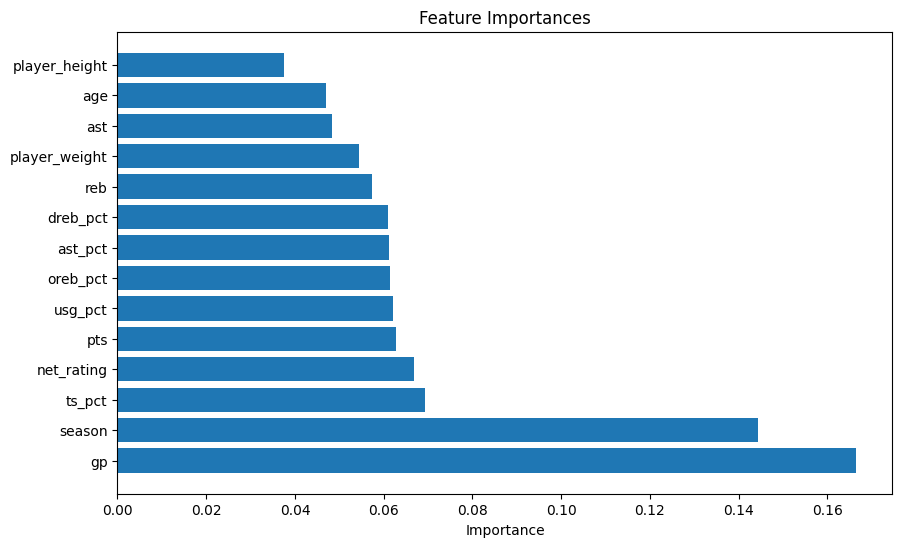

In [252]:
feature_names = injuries_bool.columns[:-1]
importances = rfc_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

Plot injuries season-over-season

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


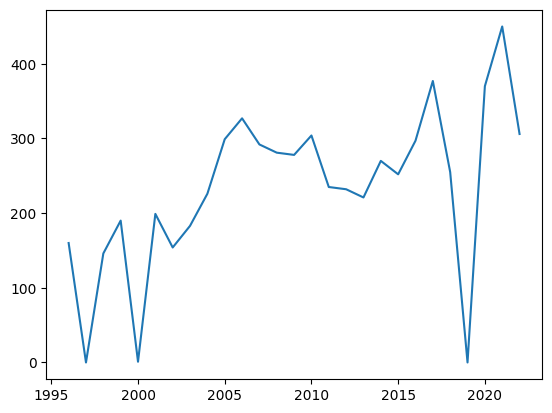

In [253]:
#2019 is removed
x = range(1996, 2023)
y = [0 for i in range(2022-1995)]
for i in range(len(injuries_bool['season'])):
  if(not i==10631):
    y[injuries_bool['season'][i]-1996]+=injuries_bool['injuries'][i]
plt.plot(x, y)
plt.show()

In [254]:
y

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[160,
 0,
 146,
 190,
 1,
 199,
 154,
 183,
 226,
 299,
 327,
 292,
 281,
 278,
 304,
 235,
 232,
 221,
 270,
 252,
 297,
 377,
 255,
 0,
 370,
 450,
 306]

In [255]:
injuries_bool[(injuries_bool['season']==2019) & (injuries_bool['injuries']==1)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,injuries


In [256]:
player_stats[(player_stats['season']==1998) & (player_stats['player_name'] =='Will Perdue')]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,injuries
1315,Will Perdue,SAS,33.0,213.36,108.86208,Vanderbilt,USA,1988,1,11,...,3.7,0.5,5.6,0.096,0.245,0.098,0.63,0.064,1998,[ankle]


# **Association Rule Mining**

In [257]:
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [258]:
injuries_bool

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,injuries
0,33.0,205.74,102.058200,83,7.2,7.9,0.8,-8.0,0.100,0.207,0.119,0.523,0.045,1996,0
1,24.0,195.58,94.800728,83,5.2,2.7,1.9,5.2,0.031,0.129,0.147,0.524,0.163,1996,0
2,25.0,205.74,102.058200,33,6.2,4.3,0.5,-8.3,0.129,0.163,0.168,0.599,0.051,1996,0
3,27.0,210.82,108.862080,47,4.0,2.0,0.4,-6.4,0.079,0.140,0.224,0.435,0.077,1996,0
4,27.0,205.74,109.315672,62,3.8,3.5,0.5,6.7,0.110,0.177,0.126,0.572,0.051,1996,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12310,25.0,210.82,113.398000,63,11.6,6.4,2.9,-7.5,0.076,0.190,0.209,0.599,0.180,2022,1
12311,28.0,195.58,90.718400,77,24.8,4.5,4.2,0.3,0.016,0.108,0.278,0.607,0.187,2022,1
12312,22.0,205.74,108.862080,53,5.2,2.6,0.3,-5.9,0.087,0.099,0.149,0.620,0.040,2022,1
12313,21.0,205.74,83.914520,37,5.7,2.1,0.9,-5.2,0.028,0.105,0.178,0.511,0.086,2022,1


In [259]:
arm = injuries_bool.copy()
for column in arm.columns:
  for i in range(len(arm)):
    if arm[column][i]>=arm[column].mean():
      arm[column][i] = 1
    else:
      arm[column][i] = 0


Streaming output truncated to the last 5000 lines.
<ipython-input-259-13f6cf6b22a6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arm[column][i] = 1
<ipython-input-259-13f6cf6b22a6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arm[column][i] = 1
<ipython-input-259-13f6cf6b22a6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arm[column][i] = 1
<ipython-input-259-13f6cf6b22a6>:5: SettingWithCopyWarning: 
A value is trying to be 

In [260]:
arm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,injuries
0,1.0,1.0,1.0,1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0,0
1,0.0,0.0,0.0,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0
2,0.0,1.0,1.0,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0,0
3,0.0,1.0,1.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0
4,0.0,1.0,1.0,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12310,1.0,1.0,1.0,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1
12311,1.0,1.0,1.0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1,1
12312,1.0,1.0,1.0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1
12313,1.0,1.0,1.0,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


In [261]:
arm_sets = apriori(arm, min_support = 0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [262]:
arm_rules = association_rules(arm_sets, metric= 'lift', min_threshold = 1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [263]:
arm_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(age),(player_height),0.948924,0.981161,0.937312,0.987763,1.006729,0.006265,1.539513,0.130859
1,(player_height),(age),0.981161,0.948924,0.937312,0.955309,1.006729,0.006265,1.142871,0.354785
2,(player_weight),(age),0.947219,0.948924,0.910678,0.961423,1.013172,0.011839,1.324001,0.246310
3,(age),(player_weight),0.948924,0.947219,0.910678,0.959695,1.013172,0.011839,1.309556,0.254533
4,(age),(gp),0.948924,0.796671,0.768088,0.809430,1.016016,0.012108,1.066954,0.308627
...,...,...,...,...,...,...,...,...,...,...
216603,(gp),"(ast, age, player_height, ts_pct, player_weigh...",0.796671,0.101989,0.100203,0.125777,1.233237,0.018951,1.027210,0.930147
216604,(net_rating),"(ast, age, player_height, ts_pct, player_weigh...",0.476086,0.162810,0.100203,0.210472,1.292752,0.022692,1.060369,0.432240
216605,(pts),"(ast, age, player_height, ts_pct, player_weigh...",0.673975,0.101015,0.100203,0.148675,1.471808,0.032121,1.055983,0.983248
216606,(season),"(ast, age, player_height, ts_pct, player_weigh...",0.993341,0.100284,0.100203,0.100875,1.005888,0.000587,1.000657,0.879106


In [264]:
arm_result_injuries = arm_rules[arm_rules['consequents']==frozenset({'injuries'})]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [265]:
arm_result_injuries[(arm_result_injuries['confidence']>=0.5) & (arm_result_injuries['lift']>1.07)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1304,"(ast, reb)",(injuries),0.445067,0.512058,0.246123,0.553001,1.079957,0.018222,1.091595,0.133417
2515,"(player_weight, age, ast)",(injuries),0.502152,0.512058,0.276654,0.550938,1.075928,0.019523,1.086579,0.141749
3474,"(ast, age, reb)",(injuries),0.435891,0.512058,0.245148,0.562407,1.098325,0.021946,1.115058,0.158698
5206,"(ast, player_height, reb)",(injuries),0.442387,0.512058,0.245635,0.555250,1.084348,0.019107,1.097113,0.139500
6172,"(player_weight, pts, ast)",(injuries),0.471782,0.512058,0.260333,0.551807,1.077625,0.018753,1.088687,0.136371
...,...,...,...,...,...,...,...,...,...,...
210474,"(ast, age, player_height, ts_pct, player_weigh...",(injuries),0.182542,0.512058,0.101989,0.558719,1.091123,0.008517,1.105738,0.102162
211496,"(ast, age, player_height, ts_pct, reb, gp, net...",(injuries),0.181730,0.512058,0.100447,0.552726,1.079419,0.007390,1.090922,0.089916
212518,"(ast, age, ts_pct, player_weight, reb, gp, net...",(injuries),0.179294,0.512058,0.100203,0.558877,1.091432,0.008394,1.106134,0.102073
213540,"(ast, player_height, ts_pct, player_weight, re...",(injuries),0.181811,0.512058,0.100528,0.552925,1.079809,0.007430,1.091410,0.090334


Other papers used game by game data to see what happened in the previous game;
Add other datasets;
Try with non-numeric;
Find some variables that could be correlated, or teams have discussed(Wisdom that relates to certain things);
ethnicity, country, etc;
**Later**: Artificially create data; maybe add minutes played

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
